In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set default font sizes
plt.rcParams.update({'font.size': 14})  # sets the default font size
plt.rcParams['axes.titlesize'] = 14   # font size for titles
plt.rcParams['axes.labelsize'] = 14   # font size for x and y labels
plt.rcParams['xtick.labelsize'] = 14  # font size for x tick labels
plt.rcParams['ytick.labelsize'] = 14  # font size for y tick labels
plt.rcParams['legend.fontsize'] = 14  # font size for legends

In [83]:
def plot_ablation_attributes():
    models = ['PGNA', 'PGNA+1GCN', 'PGNA+2GCN']
    datasets = ['0.1', '0.3', '0.5', '0.7', '0.9']
    
    # Random data to simulate the bar heights
    data = {
        'PGNA': [0.822, 0.785, 0.753, 0.718, 0.663],
        'PGNA+1GCN': [0.664, 0.680, 0.662, 0.635, 0.598],
        'PGNA+2GCN': [0.634, 0.646, 0.638, 0.614, 0.579],
    }
    
    colors = ['salmon', 'skyblue', 'lightgreen']
    patterns = ['/', '', '.']  # Adding patterns to mimic the screenshot
    num_datasets = len(datasets)
    x = np.arange(num_datasets)  # the label locations
    width = 0.25  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects = []
    
    for i, model in enumerate(models):
        rects.append(ax.bar(x + i * width, data[model], width, label=model, hatch=patterns[i]))
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('alpha')
    ax.set_ylabel('MRR')
    ax.set_xticks(x + width)  # Adjust x so that ticks are in the middle of the group
    ax.set_xticklabels(datasets)
    ax.legend()
    
    # Add text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylim(0, 0.9)  # Adjusting the y-axis limit to mimic the screenshot
    
    fig.tight_layout()
    plt.savefig('plots/ablation-attributes', dpi=360)
    plt.show()

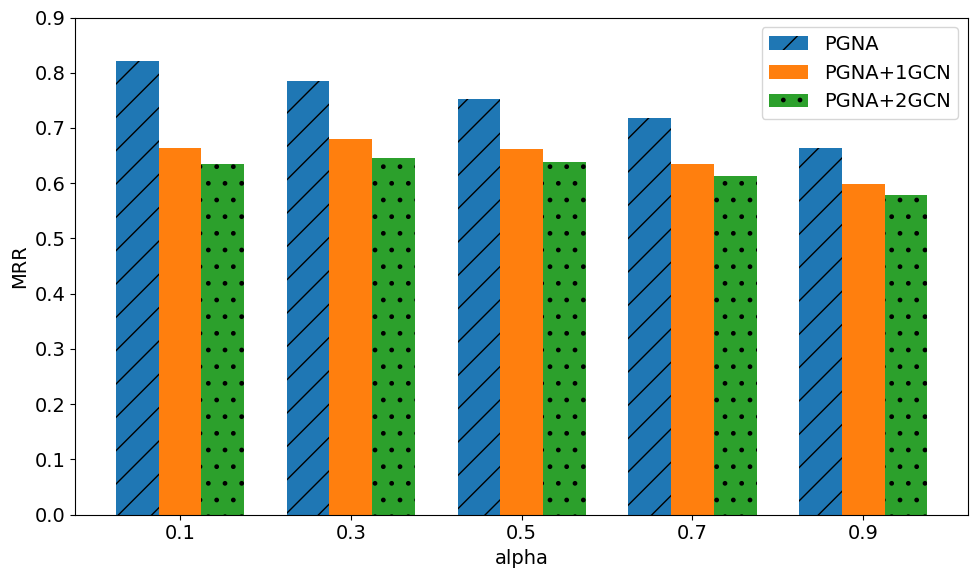

In [84]:
plot_ablation_attributes()

In [29]:
def plot_ablation_depth_and_regularization():
    # Data
    datasets = ['Foursquare-Twitter', 'ACM-DBLP', 'Phone-Email']
    models_1 = ['1 layer', '2 layers', '5 layers', '10 layers']
    models_2 = ['R Loss', 'WR Loss', 'WRR Loss']
    
    hit_data_depth = np.array([
        [0.358, 0.361, 0.371, 0.362],  
        [0.897, 0.899, 0.905, 0.896],  
        [0.743, 0.746, 0.749, 0.745]   
    ]).T
    
    hit_data_reg = np.array([
        [0.271, 0.274, 0.287],  
        [0.812, 0.817, 0.841],
        [0.374, 0.381, 0.413]   
    ]).T

    colors1 = ['salmon', 'skyblue', 'lightgreen', 'yellow']
    colors2 = ['skyblue', 'salmon', 'lightgreen']
    patterns1 = ['/', '', '.', '']
    patterns2 = ['/', '', '.']  # Adding patterns to mimic the screenshot
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Bar width and positions
    bar_width1=0.2
    bar_width2=0.25
    index = np.arange(len(datasets))
    
    # Plotting Hit@30
    for i, model in enumerate(models_1):
        axes[0].bar(index + i*bar_width1, hit_data_depth[i], bar_width1, label=model)
    
    axes[0].set_xticks(index + bar_width1*1.5)
    axes[0].set_xticklabels(datasets)
    axes[0].set_ylim(0, 1.1)  # slightly above 1 to make it visually pleasing
    axes[0].legend()
    
    # Plotting MRR
    for i, model in enumerate(models_2):
        axes[1].bar(index + i*bar_width2, hit_data_reg[i], bar_width2, label=model)
    
    axes[1].set_xticks(index + bar_width2)
    axes[1].set_xticklabels(datasets)
    axes[1].set_ylim(0, 1.1)
    axes[1].legend()
    
    # General settings
    plt.tight_layout()
    plt.savefig('plots/ablation-depth-reg', dpi=360)
    plt.show()

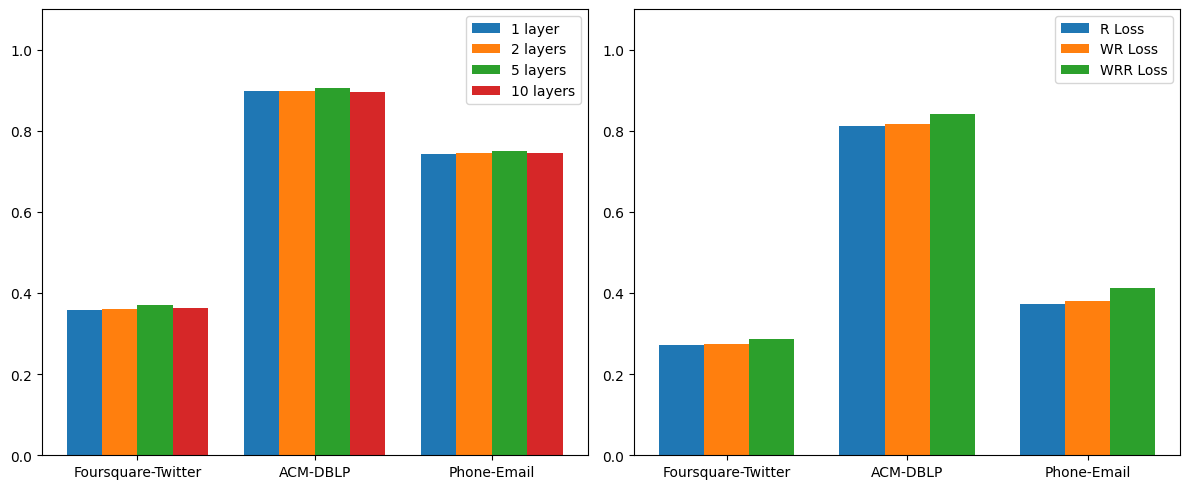

In [30]:
plot_ablation_depth_and_regularization()

In [79]:
def plot_ablation_depth():
    datasets = ['Foursquare-Twitter', 'ACM-DBLP', 'Phone-Email']
    layers = ['1 layer', '2 layers', '5 layers', '10 layers']
    
    # Random data to simulate the bar heights
    data = np.array([
        [0.358, 0.361, 0.371, 0.362],  
        [0.897, 0.899, 0.905, 0.896],  
        [0.743, 0.746, 0.749, 0.745] 
    ])

    n_datasets = len(datasets)  # Number of datasets
    n_layers = len(layers)  # Number of different layer settings
    index = np.arange(n_datasets)  # X locations for the groups
    bar_width = 0.2  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(n_layers):
        ax.bar(index + i * bar_width, data[:, i], bar_width, label=layers[i])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Hit@30')
    ax.set_xticks(index + bar_width * (n_layers - 1) / 2)
    ax.set_xticklabels(datasets)
    ax.legend()
    
    fig.tight_layout()
    plt.savefig('plots/ablation-depth', dpi=360)
    plt.show()

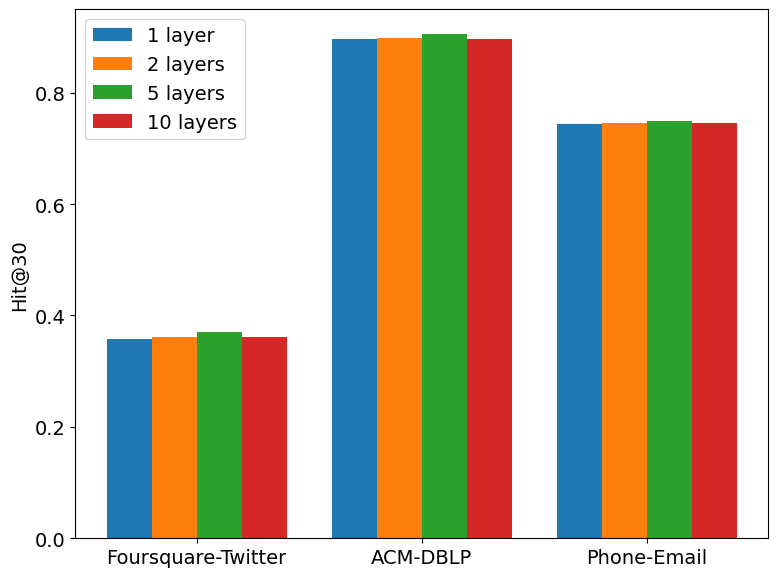

In [80]:
plot_ablation_depth()

In [86]:
def plot_ablation_reg():
    datasets = ['Foursquare-Twitter', 'ACM-DBLP', 'Phone-Email']
    layers = ['R Loss', 'WR Loss', 'WRR Loss']
    
    # Random data to simulate the bar heights
    data = np.array([
        [0.271, 0.274, 0.287],  
        [0.812, 0.817, 0.841],
        [0.374, 0.381, 0.413]  
    ])

    n_datasets = len(datasets)  # Number of datasets
    n_layers = len(layers)  # Number of different layer settings
    index = np.arange(n_datasets)  # X locations for the groups
    bar_width = 0.25  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(n_layers):
        ax.bar(index + i * bar_width, data[:, i], bar_width, label=layers[i])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Hit@10')
    ax.set_xticks(index + bar_width * (n_layers - 1) / 2)

    ax.set_xticklabels(datasets, fontsize=12)
    ax.legend()
    
    fig.tight_layout()
    plt.savefig('plots/ablation-reg', dpi=360)
    plt.show()

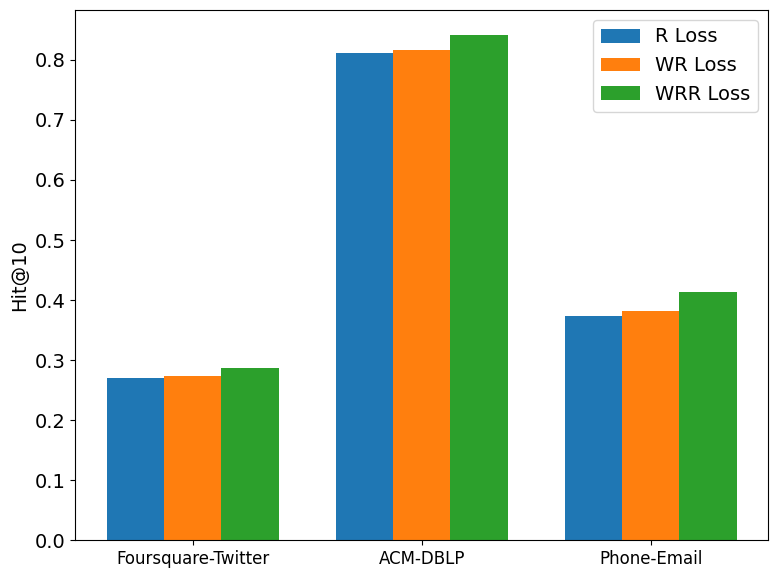

In [87]:
plot_ablation_reg()

In [4]:
def plot_gcn(dataset, data, max_ylim=0.9):
    models = ['PGNA', 'PGNA+1GCN', 'PGNA+2GCN', 'PGNA+3GCN']
    datasets = ['0.1', '0.3', '0.5', '0.7', '0.9']
    
    colors = ['salmon', 'skyblue', 'lightgreen', 'red']
    patterns = ['/', '', '.', '\\']  # Adding patterns to mimic the screenshot
    num_datasets = len(datasets)
    x = np.arange(num_datasets)  # the label locations
    width = 0.2  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects = []
    
    for i, model in enumerate(models):
        rects.append(ax.bar(x + i * width, data[model], width, label=model, hatch=patterns[i]))
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(dataset)
    ax.set_xlabel('alpha')
    ax.set_ylabel('MRR')
    ax.set_xticks(x + 1.5 * width)  # Adjust x so that ticks are in the middle of the group
    ax.set_xticklabels(datasets)
    ax.legend()
    
    # Add text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylim(0, max_ylim)  # Adjusting the y-axis limit to mimic the screenshot
    
    fig.tight_layout()
    plt.savefig(f'plots/{dataset}_gcn', dpi=360)
    plt.show()

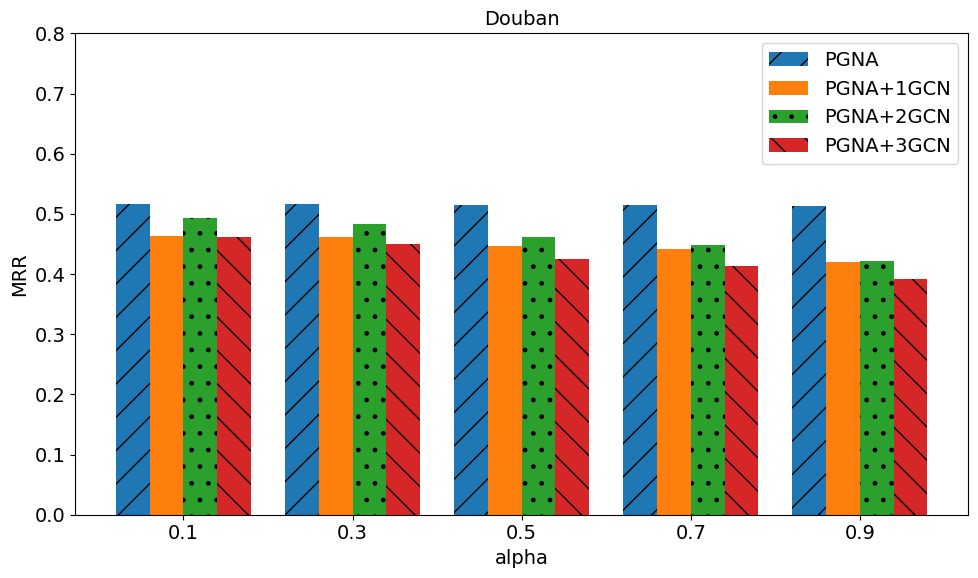

In [20]:
douban_data = {
    'PGNA': [0.5161, 0.5171, 0.5149, 0.5149, 0.5138],
    'PGNA+1GCN': [0.4625, 0.4609, 0.4466, 0.4412, 0.4195],
    'PGNA+2GCN': [0.4924, 0.4825, 0.4618, 0.4478, 0.4213],
    'PGNA+3GCN': [0.4620, 0.4498, 0.4242, 0.4136, 0.3917]
}
plot_gcn('Douban', douban_data, 0.8)

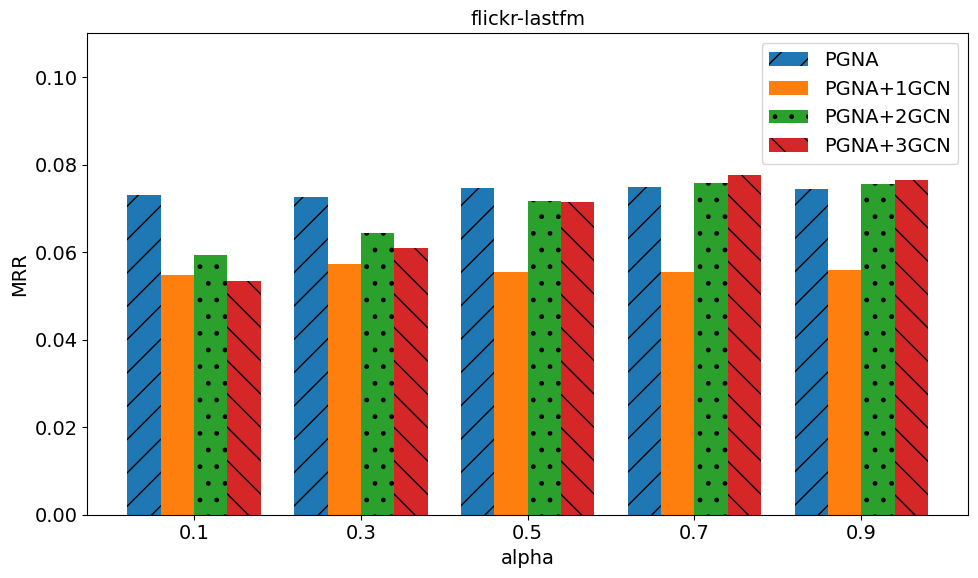

In [7]:
flickr_data = {
    'PGNA': [0.0730, 0.072524, 0.074719, 0.074935, 0.074465],
    'PGNA+1GCN': [0.054834, 0.057179, 0.055427, 0.055418, 0.055881],
    'PGNA+2GCN': [0.059343, 0.064439, 0.071620, 0.075881, 0.075564],
    'PGNA+3GCN': [0.053520, 0.060965, 0.071468, 0.077607, 0.076498]
}
plot_gcn('flickr-lastfm', flickr_data, 0.11)